# FIFA ULTIMATE TEAM DB

The provided dataset includes information on all ultimate team players from Fifa 13 to Fifa 22 ("fifa13.csv", "fifa13gk.csv", etc.). The dataset is divided into two main folders: Gks and players, containing CSV files for each Fifa game. Each CSV file contains information on the player's name, position, rating score (RTG), card type, nation, and gameplay skill statistics including pace (PAC), shooting (SHO), passing (PAS), dribbling (DRI), defending (DEF), and physical (PHY). A link to the player's Wefut page is also provided. Any modifications or additional files can be flagged to the dataset owner.


The notebook is divided into the following sections:

1. Introduction.
2. Data Warning.
3. EDA (Exploratory Data Analysis)
4. Modelling.
5. Conclusions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Introduction

In this notebook, we will be exploring a dataset containing information on all Ultimate Team players from FIFA 13 to FIFA 22. The dataset is divided into two main folders: "Gks" and "players", each containing CSV files for each FIFA game. The data available in each CSV file includes the player's name, rating score (RTG), position, card type, nation, and various gameplay skill statistics such as pace (PAC), shooting (SHO), passing (PAS), dribbling (DRI), defending (DEF), and physical (PHY). Additionally, a link to the player's Wefut page is provided. In the following sections, we will perform exploratory data analysis (EDA) on this dataset, and investigate any trends or patterns that emerge. Please feel free to suggest any modifications or additional files that you think may be useful.

The following questions is working in htis notebook:

1. What is the distribution of RTG (rating score) values in the dataset? Is there any player that stands out significantly in terms of their score?

2. Is there any relationship between a player's position and their RTG score?

3. Which countries have the most players in the dataset? How are RTG scores distributed among these countries?

4. What is the distribution of gameplay skill values (PAC, SHO, PAS, DRI, DEF, PHY) in the dataset? Is there any particular skill that stands out significantly in terms of its score?

5. How do the different gameplay skills relate to each other? Is there any strong or weak correlation between them?

6. Is there any pattern in the distribution of gameplay skills based on a player's position?

7. What is the distribution of different card types in the dataset? Is there any type that is more common than others?

8. Is there any relationship between card type and a player's RTG score?

9. Is there any relationship between card type and a player's position?

10. How has the profile of Ultimate Team players changed from FIFA 13 to FIFA 22? Have there been significant changes in the distribution of gameplay skills or other key aspects?





We have read the databases, and for ease of use, we will unify the databases into one for both goalkeepers and players. We also added a year column to later study the behavior by year.

In [3]:
dfs_gks = []
for year in range(13,23):
    filename = f'../data/GKs/FifA{year}gk.csv'
    df = pd.read_csv(filename)
    df['year'] = year
    dfs_gks.append(df)
    
df_gks = pd.concat(dfs_gks, axis=0, ignore_index=True)

dfs_players = []
for year in range(13,23):
    filename = f'../data/Players/FifA{year}.csv'
    df = pd.read_csv(filename)
    df['year'] = year
    dfs_players.append(df)
    
df_players = pd.concat(dfs_players, axis=0, ignore_index=True)

In [4]:
df_gks.head()

,Name,Rtg,Card,Nation,DIV,HAN,KIC,REF,SPE,POS,Link,year
0,Casillas,95,toty,Spain,97,90,73,98,70,92,https://wefut.com/player/13/11568/casillas,13
1,Gianluigi Buffon,92,goldblue,Italy,93,88,70,90,65,94,https://wefut.com/player/13/13081/gianluigi-bu...,13
2,Victor Valdés,89,goldblue,Spain,88,87,81,89,63,94,https://wefut.com/player/13/13235/victor-valdes,13
3,Federico Marchetti,89,goldblue,Italy,91,87,69,93,60,89,https://wefut.com/player/13/13074/federico-mar...,13
4,René Adler,89,goldblue,Germany,93,88,75,92,59,91,https://wefut.com/player/13/13050/rene-adler,13


In [5]:
df_players.head()

,Name,Rtg,Pos,Card,Nation,PAC,SHO,PAS,DRI,DEF,PHY,Link,year,Nombre,Rating,Posicion/es,Carta,Pais
0,Lionel Messi,98.0,CF,toty,Argentina,97,96,92,99,48,76,https://wefut.com/player/13/11598/lionel-messi,13,NaN,NaN,NaN,NaN,NaN
1,Lionel Messi,97.0,CF,goldblue,Argentina,96,96,90,98,47,75,https://wefut.com/player/13/13232/lionel-messi,13,NaN,NaN,NaN,NaN,NaN
2,Cristiano Ronaldo,97.0,LW,toty,Portugal,96,96,86,97,53,92,https://wefut.com/player/13/11599/cristiano-ro...,13,NaN,NaN,NaN,NaN,NaN
3,Cristiano Ronaldo,96.0,LW,goldblue,Portugal,95,96,85,95,52,91,https://wefut.com/player/13/13233/cristiano-ro...,13,NaN,NaN,NaN,NaN,NaN
4,Iniesta,96.0,CM,toty,Spain,79,76,99,97,71,60,https://wefut.com/player/13/11594/iniesta,13,NaN,NaN,NaN,NaN,NaN


## Data Warning

Before answering the previously raised questions, we need to perform some analysis on our data. We start by validating the missing data in the databases.

In [6]:
print(df_gks.isnull().sum())
print('*'*10)
print(df_players.isnull().sum())

Name      0
Rtg       0
Card      0
Nation    0
DIV       0
HAN       0
KIC       0
REF       0
SPE       0
POS       0
Link      0
year      0
dtype: int64
**********
Name            20686
Rtg             20683
Pos             20684
Card            20683
Nation          20683
PAC                 0
SHO                 0
PAS                 0
DRI                 0
DEF                 0
PHY                 0
Link                0
year                0
Nombre         201966
Rating         201966
Posicion/es    201966
Carta          201966
Pais           201967
dtype: int64


Next, we performed an analysis on the data to study if there are any outliers.

<Axes: >

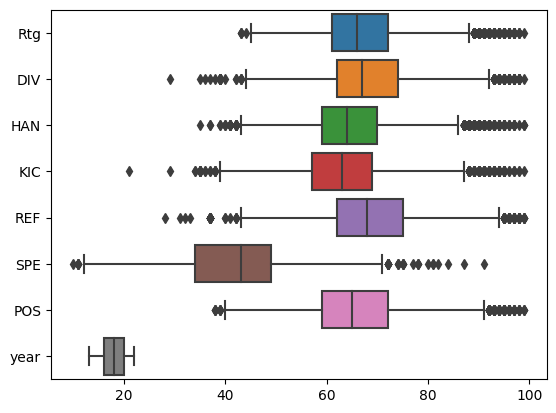

In [7]:
numeric_cols = df_gks.select_dtypes(include=['float64', 'int64'])

sns.boxplot(data=numeric_cols, orient='h')

<Axes: >

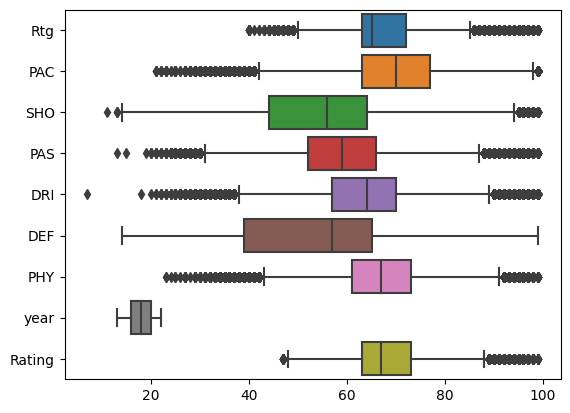

In [8]:
numeric_cols = df_players.select_dtypes(include=['float64', 'int64'])

sns.boxplot(data=numeric_cols, orient='h')

We can observe that there are many outliers for each of the numerical columns, however, such distribution is expected since players are exposed to different environments and therefore such measures can be highly variable.